# Analiza podatkov o medaljah na olimpijskih igrah

## Inicializacija

In [46]:
import pandas as pd
pd.options.display.max_rows = 20

Branje podatkov iz datotek

In [47]:
drzave_brez = pd.read_csv('./csv_reorganizirane/drzave_brez_medalj.csv', index_col=0)
drzave_medalje = pd.read_csv('./csv_reorganizirane/skupno_stevilo_medalj.csv', index_col=0)
drzave_udelezbe_poletne = pd.read_csv('./csv_reorganizirane/stevilo_udelezb_drzav_OI.csv', index_col=0)
drzave_udelezbe_zimske = pd.read_csv('./csv_reorganizirane/stevilo_udelezb_drzav_ZOI.csv', index_col=0)
medalisti = pd.read_csv('./csv_reorganizirane/veckratni_olimpijski_medalisti.csv', index_col=0)

Za medaliste izračunamo skupno število medalj

In [48]:
medalisti['skupaj_medalj'] = medalisti.zlate + medalisti.srebrne + medalisti.bronaste

---
## Najuspešnejše države

### Najuspešnejše države po številu medalj

Sortiramo podatke o medaljah držav po ustreznem tolpcu in izrišemo kot stolpični diagram.

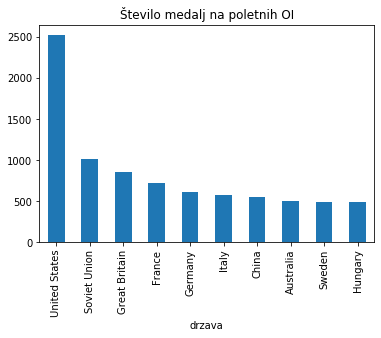

In [68]:
najuspesnejse_poletne = drzave_medalje.sort_values('vse_poletne', ascending=False)[['drzava', 'vse_poletne']][:10]
najuspesnejse_poletne.plot.bar(x='drzava', y='vse_poletne', title='Število medalj na poletnih OI', legend=False)

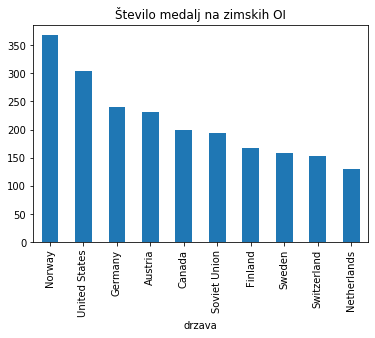

In [65]:
najuspesnejse_zimske = drzave_medalje.sort_values('vse_zimske', ascending=False)[['drzava', 'vse_zimske']][:10]
najuspesnejse_zimske.plot.bar(x='drzava', y='vse_zimske', title='Število medalj na zimskih OI', legend=False)

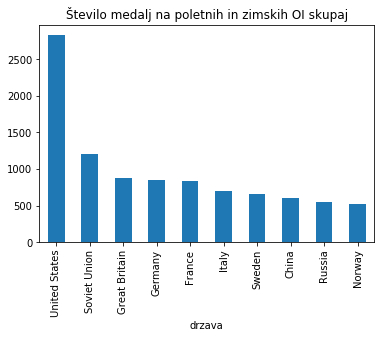

In [69]:
najuspesnejse_skupaj = drzave_medalje.sort_values('vse_skupaj', ascending=False)[['drzava', 'vse_skupaj']][:10]
najuspesnejse_skupaj.plot.bar(x='drzava', y='vse_skupaj', title='Število medalj na poletnih in zimskih OI skupaj', legend=False)

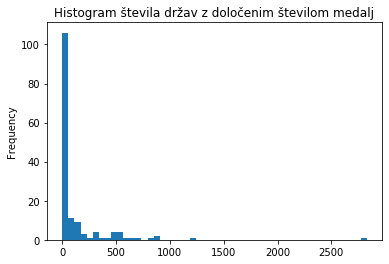

In [92]:
drzave_medalje['vse_skupaj'].plot.hist(bins=50, title="Histogram števila držav z dolocenim stevilom medalj")

Pogledamo lahko tudi povezavo med številom medalj na poletnih in zimskih igrah. Iz spodnjega grafa je razvidno odstopanje ZDA in Norveške, vsake v svojo smer.

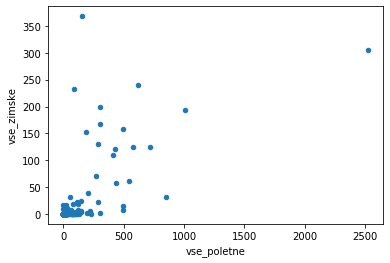

In [82]:
drzave_medalje.plot.scatter(x='vse_poletne', y='vse_zimske')

Korelacija, ki se kaže na tem grafu, je lahko povezana s številom udeležb. Izrišemo lahko graf števila medalj v odvisnosti od števila udeležb.

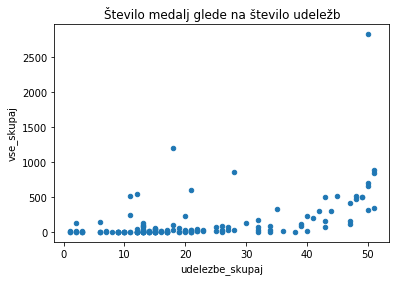

In [130]:
drzave_medalje.plot.scatter(x='udelezbe_skupaj', y='vse_skupaj', title="Število medalj glede na število udeležb")

Iz tega grafa je očitno, da obstaja korelacija med obojim, zato zgolj absolutno število medalj morda ni najboljši način za presojanje uspešnosti neke države. 
To korelacijo lahko tudi izračunamo:

In [149]:
print('Korelacija znaša {:.3f}'.format(drzave_medalje.corrwith(drzave_medalje.udelezbe_skupaj).vse_skupaj))

Korelacija znaša 0.500


### Najuspešnejše države po številu medalj na udeležbo

Število medalj posamezne države delimo s številom udeležb na OI, tako dobimo povprečno število medalj na posamezno udeležbo države. Na ta način se bolj pravično primerja države, ki sodelujejo na OI že od začetka, z državami, ki ne obstajajo več ali na začetku OI še niso obstajale. Pri tem bom upošteval le ekipe, ki so nastopile na več kot dveh OI in na ta način upošteval le ekipe, ki pripadajo državam.

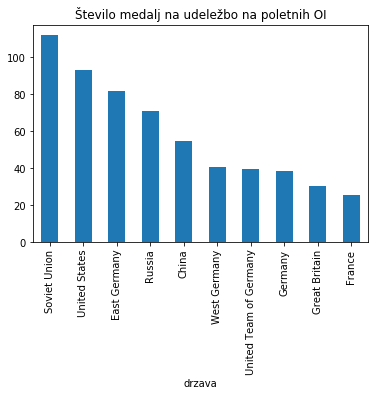

In [134]:
drzave_medalje['medalje_na_udelezbo_poletne'] = drzave_medalje.vse_poletne/drzave_medalje.udelezbe_poletne

najuspesnejse_na_udelezbo_poletne = drzave_medalje.sort_values('medalje_na_udelezbo_poletne', ascending=False)
najuspesnejse_na_udelezbo_poletne = najuspesnejse_na_udelezbo_poletne[najuspesnejse_na_udelezbo_poletne.udelezbe_skupaj > 2][['drzava', 'medalje_na_udelezbo_poletne']][:10]
najuspesnejse_na_udelezbo_poletne.plot.bar(x='drzava', y='medalje_na_udelezbo_poletne', title='Število medalj na udeležbo na poletnih OI', legend=False)

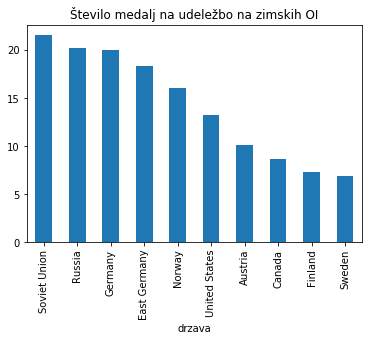

In [132]:
drzave_medalje['medalje_na_udelezbo_zimske'] = drzave_medalje.vse_zimske/drzave_medalje.udelezbe_zimske

najuspesnejse_na_udelezbo_zimske = drzave_medalje.sort_values('medalje_na_udelezbo_zimske', ascending=False)
najuspesnejse_na_udelezbo_zimske = najuspesnejse_na_udelezbo_zimske[najuspesnejse_na_udelezbo_zimske.udelezbe_skupaj > 2][['drzava', 'medalje_na_udelezbo_zimske']][:10]
najuspesnejse_na_udelezbo_zimske.plot.bar(x='drzava', y='medalje_na_udelezbo_zimske', title='Število medalj na udeležbo na zimskih OI', legend=False)

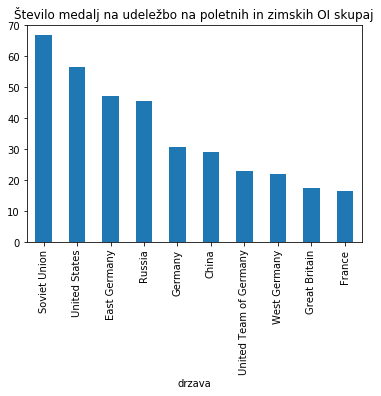

In [128]:
drzave_medalje['medalje_na_udelezbo'] = drzave_medalje.vse_skupaj/drzave_medalje.udelezbe_skupaj

najuspesnejse_na_udelezbo = drzave_medalje.sort_values('medalje_na_udelezbo', ascending=False)
najuspesnejse_na_udelezbo = najuspesnejse_na_udelezbo[najuspesnejse_na_udelezbo.udelezbe_skupaj > 2][['drzava', 'medalje_na_udelezbo']][:10]
najuspesnejse_na_udelezbo.plot.bar(x='drzava', y='medalje_na_udelezbo', title='Število medalj na udeležbo na poletnih in zimskih OI skupaj', legend=False)

Ogledamo si lahko korelacijo med povprečnim številom medalj držav na poletnih in zimskih OI:

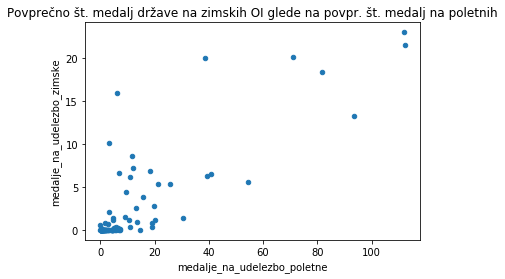

In [135]:
drzave_medalje.plot.scatter(x='medalje_na_udelezbo_poletne', y='medalje_na_udelezbo_zimske', title='Povprečno št. medalj države na zimskih OI glede na povpr. št. medalj na poletnih')

Očitno obstaja velika pozitivna korelacija, ki jo lahko tudi izračunamo. Iz seznama najuspešnejših držav po tem kriteriju lahko ugibam, da je to povezano s številom prebivalcev, vendar s podatki, ki jih imam, tega ne morem preveriti.

In [152]:
print('Korelacija znaša {:.3f}'.format(drzave_medalje.corrwith(drzave_medalje.medalje_na_udelezbo_poletne).medalje_na_udelezbo_zimske))

Korelacija znaša 0.840


---
## Najuspešnejši športniki po skupnem številu medalj

In [167]:
medalisti[:10].sort_values('skupaj_medalj', ascending=False)

,rank,atlet,drzava,sport,leta,igre,spol,zlate,srebrne,bronaste,skupaj_medalj
0,1,Michael Phelps,United States,Swimming,2000-2016,Summer,M,23,3,2,28
1,2,Larisa Latynina,Soviet Union,Gymnastics,1956–1964,Summer,F,9,5,4,18
2,3,Marit Bjørgen,Norway,Cross-country skiing,2002–2018,Winter,F,8,4,3,15
3,4,Nikolai Andrianov,Soviet Union,Gymnastics,1972–1980,Summer,M,7,5,3,15
4,5,Ole Einar Bjørndalen,Norway,Biathlon,1998–2014,Winter,M,8,4,1,13
5,6,Boris Shakhlin,Soviet Union,Gymnastics,1956–1964,Summer,M,7,4,2,13
6,7,Edoardo Mangiarotti,Italy,Fencing,1936–1960,Summer,M,6,5,2,13
7,8,Takashi Ono,Japan,Gymnastics,1952–1964,Summer,M,5,4,4,13
8,9,Paavo Nurmi,Finland,Athletics,1920–1928,Summer,M,9,3,0,12
9,10,Birgit Fischer,East Germany,Canoeing,1980–2004,Summer,F,8,4,0,12


Športnike grupiramlo po državah, seštejemo skupno število medalj vseh športnikov posamezne države in preštejemo št. športnikov posamezne države na seznamu najboljših.

In [205]:
medalisti_po_drzavah1 = medalisti.groupby('drzava')

medalisti_po_drzavah = medalisti_po_drzavah1.sum()[['zlate', 'srebrne', 'bronaste', 'skupaj_medalj']]
medalisti_po_drzavah['stevilo_sportnikov'] = medalisti_po_drzavah1.count()['atlet']

medalisti_po_drzavah.sort_values('stevilo_sportnikov', ascending=False)[:10]

,zlate,srebrne,bronaste,skupaj_medalj,stevilo_sportnikov
drzava,,,,,
United States,143,57,42,242,25
Soviet Union,57,53,27,137,13
Norway,44,24,10,78,8
Italy,26,23,22,71,8
Australia,24,22,10,56,7
Germany,24,23,15,62,7
Japan,36,17,12,65,7
Hungary,30,15,12,57,7
Finland,30,13,14,57,7


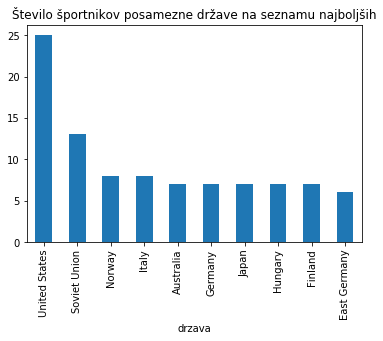

In [206]:
medalisti_po_drzavah = medalisti_po_drzavah.reset_index()
medalisti_po_drzavah.sort_values('stevilo_sportnikov', ascending=False)[:10].plot.bar(x='drzava', y='stevilo_sportnikov', title='Število športnikov posamezne države na seznamu najboljših', legend=False)

### Povezava med najbolj uspešnimi športniki in državami

Združiti moramo tabeli držav in športnikov

In [226]:
drzave_sportniki = pd.merge(drzave_medalje, medalisti_po_drzavah[['drzava', 'stevilo_sportnikov']], how='left')
drzave_sportniki['stevilo_sportnikov'] = drzave_sportniki['stevilo_sportnikov'].fillna(value=0)

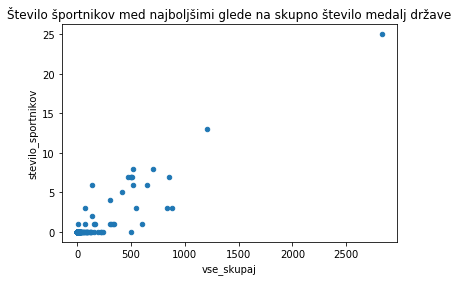

In [227]:
drzave_sportniki.plot.scatter(x='vse_skupaj', y='stevilo_sportnikov', title='Število športnikov med najboljšimi glede na skupno število medalj države')

Povezava med obema parametroma je iz graf očitna. Izračunamo še korelacijo:

In [228]:
print('Korelacija znaša {:.3f}'.format(drzave_sportniki.corrwith(drzave_sportniki.vse_skupaj).stevilo_sportnikov))

Korelacija znaša 0.912


Države z največ medaljami imajo tudi največ uspešnih športnikov. 

Ali pa velja enako tudi, če uspešnost države merimo s povprečnim številom medalj na udeležbo?

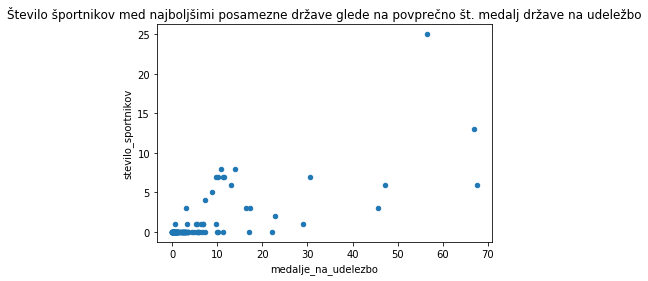

In [232]:
drzave_sportniki.plot.scatter(x='medalje_na_udelezbo', y='stevilo_sportnikov', title='Število športnikov med najboljšimi posamezne države glede na povprečno št. medalj države na udeležbo')

In [233]:
print('Korelacija znaša {:.3f}'.format(drzave_sportniki.corrwith(drzave_sportniki.medalje_na_udelezbo).stevilo_sportnikov))

Korelacija znaša 0.732


Korelacija je tu sicer manjša, a še vedno visoka. Trdim torej lahko, da imajo države z največjim povprečnim št. medalj na udeležbo tudi največ športnikov na seznamu najuspešnejših.